# **AP155 Lab Assignment**
## Module 4: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Quiamjot, Allyn Christian\
_Student No._: 2021-07198\
_Section_: HX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: Nov 23, 2023 3:46PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: ALLYN CHRISTIAN I. QUIAMJOT**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/50
* Problem 2 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits.

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(25 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$.

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(25 pts.)*

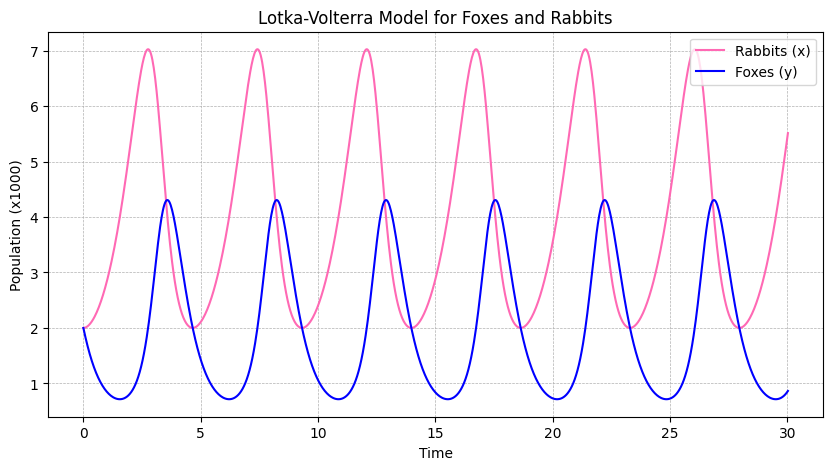

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#   define dx/dt and dy/dt
def f(u, t):
    x,y = u                         #   x = u[0] and y = u[1]. u is an array with 2 elements
    dxdt = alpha*x - beta*x*y       #   dx/dt
    dydt = gamma*x*y - delta*y      #   dy/dt
    result = np.array([dxdt, dydt])         #   store dx/dt and dy/dt values in an array
    return result                           #   return result array

#   Runge-Kutta method for solving the system of differential equations
def rungeKutta(u, t):
    k1 = h*f(u, t)
    k2 = h*f(u+0.5*k1, t+0.5*h)
    k3 = h*f(u+0.5*k2, t+0.5*h)
    k4 = h*f(u+k3, t+h)
    u += (k1 + 2*k2 + 2*k3 + k4)/6
    return u

#   initialize parameters, defining constants
alpha = 1
beta, gamma = 0.5, 0.5
delta = 2

x0, y0 = 2.0, 20        #   initial condition (rabbits = 2, foxes = 2)

a = 0                   #   initial time 
b = 30                  #   final time
N = 1000                #   number of data points for the simulation
h = (b-a)/N             #   time step interval given number of points

t_points = np.arange(a, b+h, h)         #   generate array of time points
x_values = []                           #   initialize array to store rabbit population
y_values = []                           #   initialize array to store fox population

u = np.array([2.0,2.0])                 #   initial condition for rabbit and  fox population

#   loop that performs runge-kutta method
for t in t_points:
    x_values.append(u[0])               
    y_values.append(u[1])
    u = rungeKutta(u, t)        #   calls runge-kutta method and updates population for different time points

#   plotting the results
plt.figure(figsize=(10, 5))
plt.plot(t_points, x_values, label = 'Rabbits (x)', color = 'hotpink')
plt.plot(t_points, y_values, label = 'Foxes (y)', color = 'blue')
plt.xlabel('Time')
plt.ylabel('Population (x1000)')
plt.title('Lotka-Volterra Model for Foxes and Rabbits')
plt.legend()
plt.grid(linestyle='--', linewidth='0.5')
plt.show()


The Lotka-Volterra model for the interaction between rabbits and foxes using the Runge-Kutta method was implemented. The populations of rabbits and foxes are simulated over a specified time interval t=0 to t=30. The model describes the predator-prey dynamics between the two species.

Initially, the rabbit population grows as they have ample resources. As the rabbit population increases, the fox population also rises because of availability of food prey. The predator-prey model has a cyclic nature as predicted by the Lotka-Volterra model




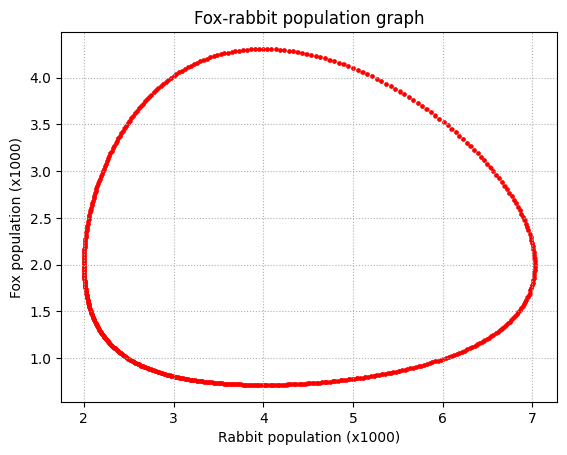

In [2]:
plt.scatter(x_values, y_values, color = 'red', marker='.', linewidths=0.1)
plt.ylabel('Fox population (x1000)')
plt.xlabel('Rabbit population (x1000)')
plt.title('Fox-rabbit population graph')
plt.grid(linestyle=':')
plt.show()

The scatter plot shows a continuous curve for the fox-rabbit population graph.

### PROBLEM 2

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(25 pts.)*

2. Make a graph of $\theta$ as a function of time. *(25 pts.)*


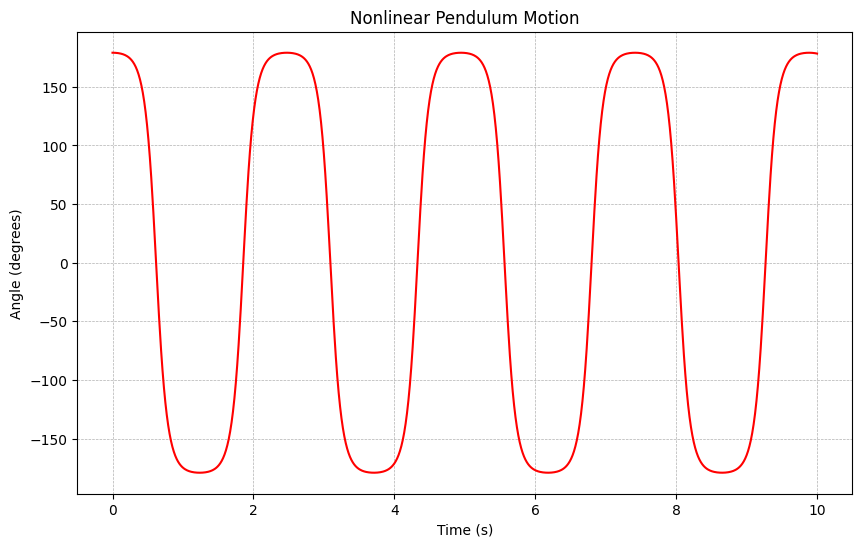

In [3]:
import matplotlib.pyplot as plt
import numpy as np

#   defining dtheta/dt and domega/dt for a nonlinear pendulum
def f(r,t):
    theta = r[0]
    w = r[1]
    dthetadt = w
    dwdt = -(g/l)*np.sin(theta)
    return np.array([dthetadt,dwdt],float)

#   implementing the runge-Kutta method for solving the differential eqs
def runge_Kutta(r, t):
    k1 = h*f(r, t)
    k2 = h*f(r+0.5*k1, t+0.5*h)
    k3 = h*f(r+0.5*k2, t+0.5*h)
    k4 = h*f(r+k3, t+h)
    r += (k1 + 2*k2 + 2*k3 + k4)/6
    return r
  
g = 9.81            #   gravitational acceleration (m/s^2)
l = 0.1             #   arm length in meters

theta0 = 179 * np.pi / 180          #   initial condition, angle is in degrees and converted to radians
r = np.array([theta0,0],float)      #   store initial conditions in an array

a = 0                               #   initial time
b = 10                              #   final time
N = 1000                            #   number of data points
h = (b-a)/N                         #   time step interval given number of data points

t_vals = np.arange(a, b+h, h)       #   generating array of time points from 0 to 10+h
theta_vals =[]                      #   initialize array to store theta values

#   loop that calls and performs the Runge-Kutta method
for t in t_vals:
    theta_vals.append(r[0])
    r = runge_Kutta(r,t)

theta_degrees = np.degrees(theta_vals)      #   converting radians to degrees before plotting using np.degrees()

#   plotting the results
plt.figure(figsize=(10,6))
plt.plot(t_vals, theta_degrees, color = 'red')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Nonlinear Pendulum Motion')
plt.grid(linestyle='--', linewidth='0.5')
plt.show()
    

This code implements the simulation of a nonlinear pendulum using the Runge-Kutta method. The differential equations describing the motion of the pendulum are solved numerically. The motion of the pendulum is influenced by gravity and the length of the pendulum arm.

The nonlinear pendulum motion is described by $\frac{d^2\theta}{dt^2} = -\frac{g}{l} \sin(\theta)$. As seen from the graph, the maximum amplitude of $\theta$, remains constant over a period of time. This is due to the interaction between the restoring force and the gravitational force. 

Moreover, when the amplitude is small, the sine term $\sin(\theta)$ is approximately equal to the angle $\theta$ (Small angle approximation). The motion then follows a simple harmonic oscillator equation, resulting in a constant amplitude.

It is important to note that for the Runge-Kutta method, the numerical solution diverges over time if the time step interval h is relatively large. Hence, the time step interval h must be small in order to fix this issue. In this case, increasing N (number of data points) decreases h and this allows the solution to not diverge over time.